# HW3

## Q1

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a=n/2+1, scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(x.mean(),1/(tau[c,g]*n)**0.5).rvs()

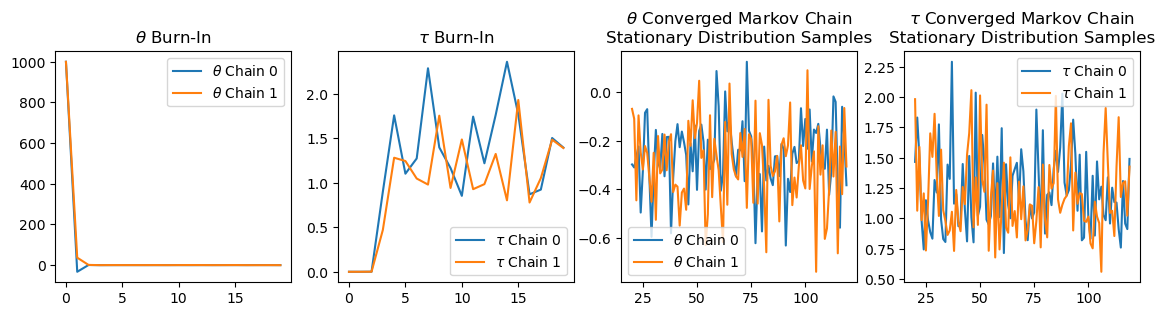

In [2]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

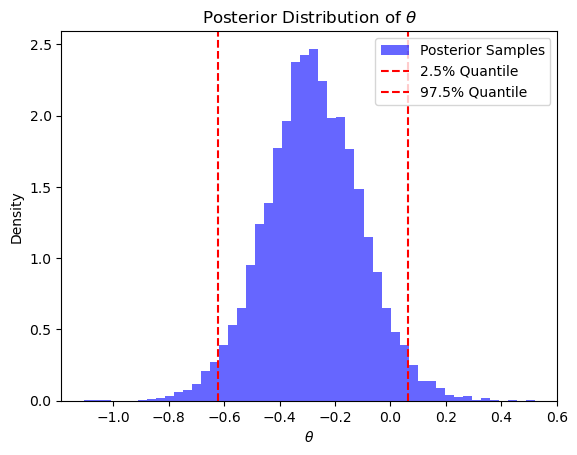

95% Bayesian Credible Interval for θ: [-0.62371902  0.06286325]


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define burn-in period (assuming burn_in = 500 from previous example)
burn_in = 500  

# Extract posterior samples after burn-in (for chain 0)
theta_samples = theta[0, burn_in:]

# Compute 95% credible interval
theta_ci = np.quantile(theta_samples, [0.025, 0.975])

# Plot histogram of posterior samples
plt.hist(theta_samples, bins=50, density=True, alpha=0.6, color='b', label="Posterior Samples")

# Plot credible interval lines
plt.axvline(theta_ci[0], color='red', linestyle="--", label="2.5% Quantile")
plt.axvline(theta_ci[1], color='red', linestyle="--", label="97.5% Quantile")

# Labels and legend
plt.title(r"Posterior Distribution of $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()

# Print 95% Bayesian Credible Interval
print(f"95% Bayesian Credible Interval for θ: {theta_ci}")


Thus, given our data and prior belief, there is a 95% probability that the true value of $\theta$ lies within [-0.62371902, 0,06286325] and it is possible that $\theta$ = 0 

## Q2

## **1. Model Setup**
We assume the following prior distributions:

- **Prior for** $ \theta $ (**Normal distribution**):

  $$ p(\theta) \sim \mathcal{N}(\theta_0, \tau_0^{-1}) $$

  where:
  - $ \theta_0 $ is the prior mean of $ \theta $.
  - $ \tau_0 $ is the prior precision (inverse variance).

- **Prior for** $ \tau $ (**Gamma distribution**):

  $$ p(\tau) \propto \tau^{\frac{\alpha_0}{2} - 1} e^{-\frac{\lambda_0}{2} \tau} $$

  which follows a **Gamma distribution**:

  $$ \tau \sim \text{Gamma}(\alpha_0/2, \lambda_0/2) $$

  where:
  - $ \alpha_0 $ is the shape parameter.
  - $ \lambda_0 $ is the rate parameter.

- **Likelihood (Normal Distribution)**:

  Given data $ \mathbf{x} = \{x_1, x_2, \dots, x_n\} $, we assume:

  $$ x_i \mid \theta, \tau \sim \mathcal{N}(\theta, \tau^{-1}) $$

  which means the **likelihood function** is:

  $$ p(\mathbf{x} \mid \theta, \tau) = \prod_{i=1}^{n} \left[ \frac{\sqrt{\tau}}{\sqrt{2\pi}} e^{-\frac{\tau}{2} (x_i - \theta)^2} \right] $$

  Simplifying:

  $$ p(\mathbf{x} \mid \theta, \tau) \propto \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2} $$

---

## **2. Full Conditional for** $ p(\tau \mid \theta, \mathbf{x}) $
Using Bayes' theorem:

$$ p(\tau \mid \theta, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau) p(\tau) $$

Substituting the likelihood and prior:

$$ p(\tau \mid \theta, \mathbf{x}) \propto \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2} \times \tau^{\frac{\alpha_0}{2} - 1} e^{-\frac{\lambda_0}{2} \tau} $$

Rearranging terms:

$$ p(\tau \mid \theta, \mathbf{x}) \propto \tau^{(\frac{\alpha_0 + n}{2}) - 1} e^{-\tau \frac{\lambda_0 +  \sum_{i=1}^{n} (x_i - \theta)^2)}{2}} $$

This is the kernel of a **Gamma distribution**, so:

$$ \tau \mid \theta, \mathbf{x} \sim \text{Gamma}(\alpha_n, \lambda_n) $$

where:

$$ \alpha_n = \frac{\alpha_0+n}{2} $$

$$ \lambda_n = \frac{\lambda_0 + \sum_{i=1}^{n} (x_i - \theta)^2}{2} $$

---

## **3. Full Conditional for** $ p(\theta \mid \tau, \mathbf{x}) $
Using Bayes' theorem:

$$ p(\theta \mid \tau, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau) p(\theta) $$

Substituting the likelihood and prior:

$$ p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2} \times e^{-\frac{\tau_0}{2} (\theta - \theta_0)^2} $$

Expanding the terms in the exponent:

$$ p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{\tau}{2} \left[ n (\theta - \bar{x})^2 + \sum_{i=1}^{n} x_i^2 - n \bar{x}^2 \right]} \times e^{-\frac{\tau_0}{2} (\theta - \theta_0)^2} $$

Since terms independent of $ \theta $ can be ignored:

$$ p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{1}{2} \left[ (n \tau + \tau_0) (\theta - \mu_n)^2 \right]} $$

where:

$$ \mu_n = \frac{\tau_0 \theta_0 + n \tau \bar{x}}{\tau_0 + n \tau} $$

This is the kernel of a **Normal distribution**, so:

$$ \theta \mid \tau, \mathbf{x} \sim \mathcal{N}(\mu_n, \sigma_n^2) $$

where:

$$ \sigma_n^2 = \frac{1}{\tau (\tau_0 + n)} $$

In [3]:
import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt

# Define hyperparameters for priors
theta0 = 0      # Prior mean for theta
tau0 = 1        # Prior precision for theta
alpha0 = 2      # Shape parameter for tau prior
lambda0 = 2     # Rate parameter for tau prior

# Generate synthetic data
n = 30
x = np.random.normal(loc=5, scale=2, size=n)

# Initialize Gibbs Sampler
C, G = 2, 10000
theta = np.zeros((C, G))
tau = np.zeros((C, G))
theta[:, 0] = 1000  # Initial value for theta

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Sample tau from Gamma
        residual = np.sum((x - theta[c, g-1])**2)
        tau[c, g] = gamma.rvs((alpha0 + n) / 2, scale=1 / (lambda0 + residual)*0.5)

        # Sample theta from Normal
        mean_n = (tau0 * theta0 + n * x.mean()) / (tau0 + n * tau[c, g])
        var_n = 1 / (tau[c, g] * (tau0 + n))
        theta[c, g] = norm.rvs(mean_n, np.sqrt(var_n))



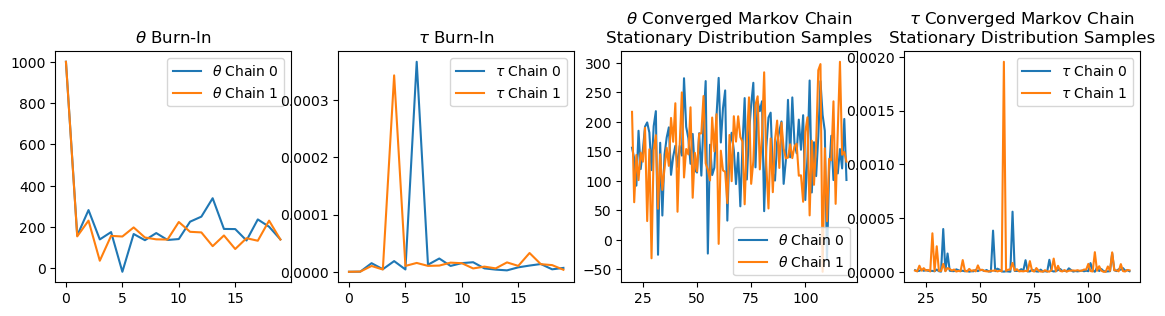

In [4]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

## **4. Interpretation of Prior Hyperparameters**
- **$ \alpha_0 $**: Represents the prior confidence in precision $ \tau $.
  - Larger $ \alpha_0 $ means stronger prior belief.
  - Acts like **adding pseudo-data points** to the prior.

- **$ \lambda_0 $**: Controls the **prior expectation of $ \tau $**.
  - The prior mean for $ \tau $ is:

    $$ E[\tau] = \frac{\alpha_0}{\lambda_0} $$

  - Higher $ \lambda_0 $ means lower expected precision (higher variance).

- **As $ n $ increases**, the likelihood dominates, reducing the effect of the prior.

** Detailed explanation

since the posterior distribution has Gamma distribution as $$ \tau \mid \theta, \mathbf{x} \sim \text{Gamma}(\alpha_n, \lambda_n) $$

where:

$$ \alpha_n = \frac{\alpha_0+n}{2} $$

$$ \lambda_n = \frac{\lambda_0 + \sum_{i=1}^{n} (x_i - \theta)^2}{2} $$

, the contribution of psedo-data points (prior contribution to posterior) can be calcuated by $\frac{\alpha_0}{n}$ which illustrates the relative contribtuion of prior compared to the data.


** Note: Also, for Gamma distribution, as the shape parameter increases, the relative variance to the mean becomes smaller such that we can say that we have more confidence about prior $\tau$ as $\alpha_0$ increases. (similar for the $\lambda_0$; as $\lambda_0$ (rate parameter) decreases, $\tau$ decreases and $\lambda_n$ increases, and it implies that smaller prior $\tau$ with larger variance.

## Q3

# **Derivation of the Dirichlet-Multinomial Posterior**

## **1. Model Setup**
We assume:

- **Likelihood (Multinomial Distribution)**:  
  Given data **$ \mathbf{x} = (x_1, x_2, ..., x_k) $**, where $ x_j $ is the count of category $ j $, and the total sample size is:

  $$ n = \sum_{j=1}^{k} x_j $$

  The likelihood function is:

  $$ p(\mathbf{x} | \boldsymbol{\theta}) = \frac{n!}{x_1! x_2! \dots x_k!} \prod_{j=1}^{k} \theta_j^{x_j} $$

- **Prior (Dirichlet Distribution)**:  
  We assume the prior over $ \boldsymbol{\theta} $ follows a **Dirichlet distribution**:

  $$ p(\boldsymbol{\theta}) = \frac{1}{B(\boldsymbol{\alpha})} \prod_{j=1}^{k} \theta_j^{\alpha_j - 1} $$

  where:

  $$ B(\boldsymbol{\alpha}) = \frac{\prod_{j=1}^{k} \Gamma(\alpha_j)}{\Gamma(\sum_{j=1}^{k} \alpha_j)} $$

  is the **normalizing constant (Beta function)**.

---

## **2. Bayes’ Theorem: Full Posterior Derivation**
By Bayes’ Theorem:

$$ p(\boldsymbol{\theta} | \mathbf{x}) = \frac{p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta})}{p(\mathbf{x})} $$

### **Numerator: Likelihood × Prior**
Substituting the **Multinomial likelihood** and **Dirichlet prior**:

$$ p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta}) =
\left[ \frac{n!}{x_1! x_2! \dots x_k!} \prod_{j=1}^{k} \theta_j^{x_j} \right]
\times
\left[ \frac{1}{B(\boldsymbol{\alpha})} \prod_{j=1}^{k} \theta_j^{\alpha_j - 1} \right] $$

$$ = \frac{n!}{x_1! x_2! \dots x_k!} \times \frac{1}{B(\boldsymbol{\alpha})} \prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1} $$

$$ = \frac{n!}{x_1! x_2! \dots x_k!} \times \frac{\prod_{j=1}^{k} \Gamma(\alpha_j)}{\Gamma(\sum_{j=1}^{k} \alpha_j)} \times \prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1} $$

This contains an **erroneous constant term** $ C $:

$$ C = \frac{n!}{x_1! x_2! \dots x_k!} \times \frac{\prod_{j=1}^{k} \Gamma(\alpha_j)}{\Gamma(\sum_{j=1}^{k} \alpha_j)} $$

So we rewrite:

$$ p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta}) = C \prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1} $$

---

### **Denominator: Evidence $ p(\mathbf{x}) $**
$$ p(\mathbf{x}) = \int p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta}) d\boldsymbol{\theta} $$

$$ = C \int \prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1} d\boldsymbol{\theta} $$

Since we recognize this as the integral of a **Dirichlet distribution**, we use the identity:

$$ \int \prod_{j=1}^{k} \theta_j^{\beta_j - 1} d\boldsymbol{\theta} = B(\boldsymbol{\beta}) $$

where $ \boldsymbol{\beta} = (\alpha_1 + x_1, ..., \alpha_k + x_k) $, so:

$$ p(\mathbf{x}) = C*B(\boldsymbol{\beta}) $$

$$ = C \times \frac{\prod_{j=1}^{k} \Gamma(\alpha_j + x_j)}{\Gamma(\sum_{j=1}^{k} (\alpha_j + x_j))}
\times \frac{\Gamma(\sum_{j=1}^{k} \alpha_j)}{\prod_{j=1}^{k} \Gamma(\alpha_j)} $$

The **erroneous term $ C $ cancels out** when substituted back into Bayes' theorem:

$$ p(\boldsymbol{\theta} | \mathbf{x}) = \frac{C \prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1}}{C B(\boldsymbol{\beta})} $$

$$ = \frac{\prod_{j=1}^{k} \theta_j^{x_j + \alpha_j - 1}}{B(\boldsymbol{\beta})} $$

Thus, the **posterior distribution** is:

$$ p(\boldsymbol{\theta} | \mathbf{x}) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, ..., \alpha_k + x_k) $$




